In [175]:
## All purpose
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [176]:
## Deeplearning/ML
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

from transformers import BertTokenizer, BertModel

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [177]:
import chardet

with open(r"F:\Tripadvisor-Data-Analysis-using-NLP\dataset\tripadvisor_hotel_review.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
    print(result)


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [178]:
df = pd.read_csv(r"F:\Tripadvisor-Data-Analysis-using-NLP\dataset\tripadvisor_hotel_review.csv", encoding='latin1')

In [179]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_score(review):
  vs = analyzer.polarity_scores(review)
  return vs['compound']

df['Sentiment_score'] = df['Review'].apply(sentiment_score)


In [180]:
print(df['Sentiment_score'])

0        0.9626
1        0.9870
2        0.9852
3        0.9920
4        0.9870
          ...  
20486    0.9699
20487    0.9753
20488    0.2629
20489    0.9776
20490   -0.0003
Name: Sentiment_score, Length: 20491, dtype: float64


In [181]:
def sentiment_category(score):
  if score > 0.5:
    return 'pos'
  elif score < -0.5:
    return 'neg'
  else:
    return 'neut'

df['Sentiment_category'] = df['Sentiment_score'].apply(sentiment_category)


In [182]:
print(df['Sentiment_category'])

0         pos
1         pos
2         pos
3         pos
4         pos
         ... 
20486     pos
20487     pos
20488    neut
20489     pos
20490    neut
Name: Sentiment_category, Length: 20491, dtype: object


In [183]:
df.isnull().sum()

S.No.                 0
Review                0
Rating                0
Sentiment_score       0
Sentiment_category    0
dtype: int64

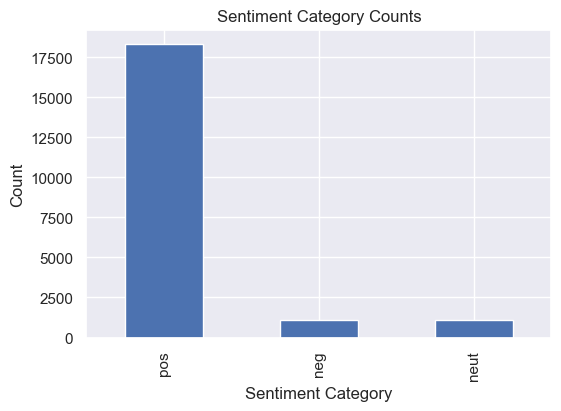

In [184]:
sentiment_counts = df['Sentiment_category'].value_counts()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Category Counts')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


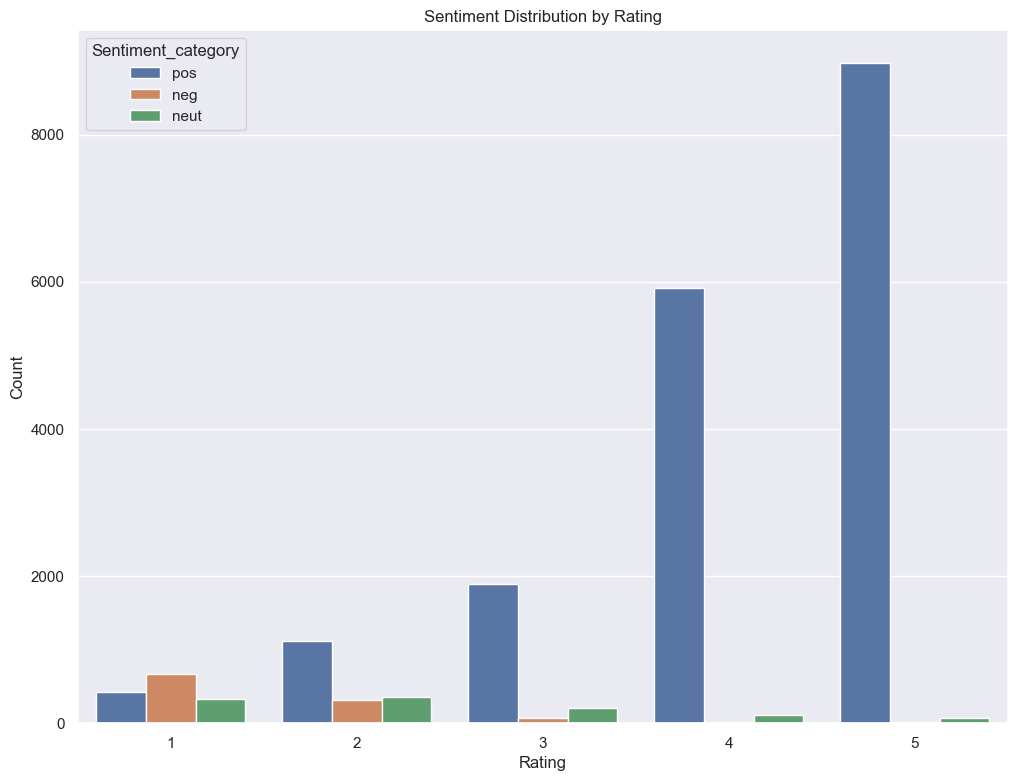

In [185]:
sns.countplot(x='Rating', hue='Sentiment_category', data=df)
plt.title('Sentiment Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

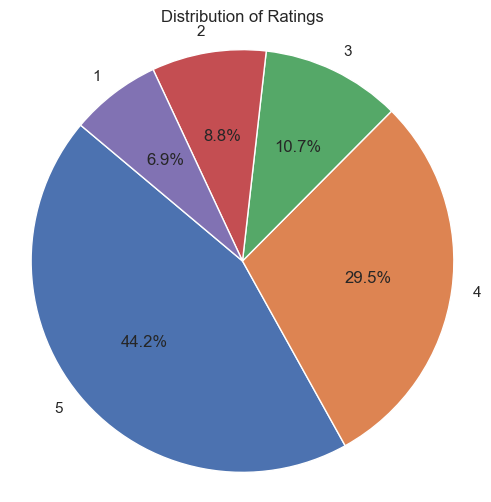

In [186]:
rating_counts = df['Rating'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.show()

In [187]:
df

,S.No.,Review,Rating,Sentiment_score,Sentiment_category
0,1,nice hotel expensive parking got good deal sta...,4,0.9626,pos
1,2,ok nothing special charge diamond member hilto...,2,0.9870,pos
2,3,nice rooms not 4* experience hotel monaco seat...,3,0.9852,pos
3,4,unique \tgreat stay \twonderful time hotel mon...,5,0.9920,pos
4,5,great stay great stay \twent seahawk game awes...,5,0.9870,pos
...,...,...,...,...,...
20486,20487,best kept secret 3rd time staying charm \tnot ...,5,0.9699,pos
20487,20488,great location price view hotel great quick pl...,4,0.9753,pos
20488,20489,ok just looks nice modern outside \tdesk staff...,2,0.2629,neut
20489,20490,hotel theft ruined vacation hotel opened sept ...,1,0.9776,pos


Correlation between sentiment score and rating: 0.6152370177323085


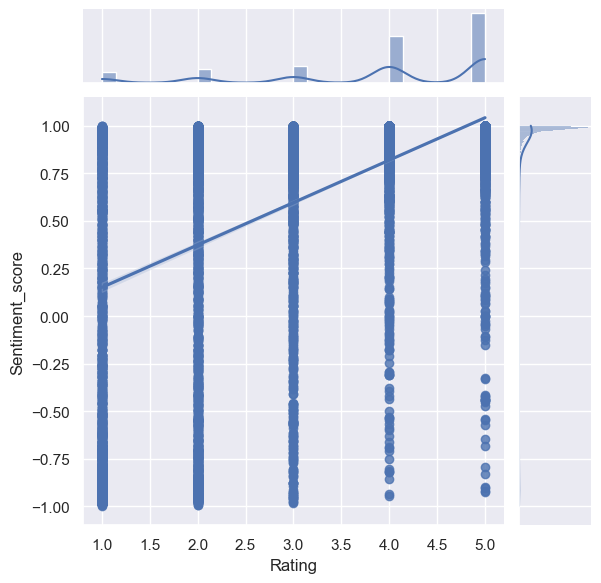

In [188]:
correlation = df['Sentiment_score'].corr(df['Rating'])
print("Correlation between sentiment score and rating:", correlation)

sns.jointplot(x='Rating', y='Sentiment_score', data=df, kind='reg')
plt.show()

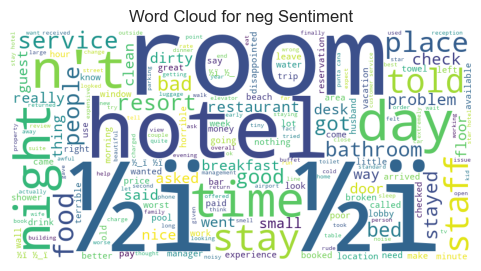

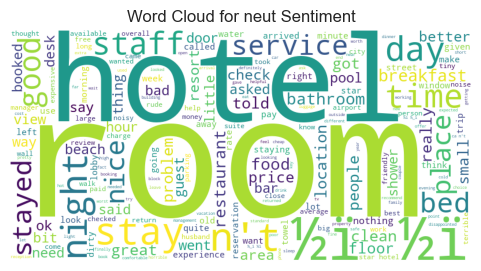

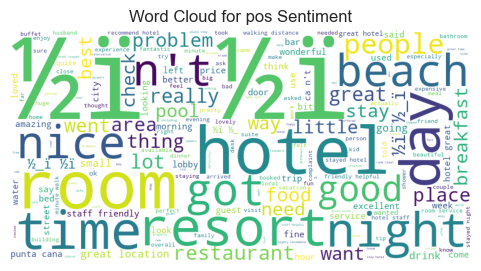

In [189]:
grouped_data = df.groupby('Sentiment_category')

def create_wordcloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(6, 3), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis('off')

for name, group in grouped_data:
  text = ' '.join(group['Review'])
  create_wordcloud(text)
  plt.title(f'Word Cloud for {name} Sentiment')


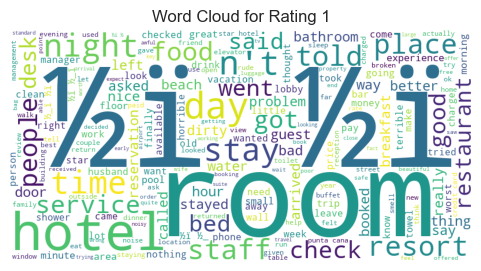

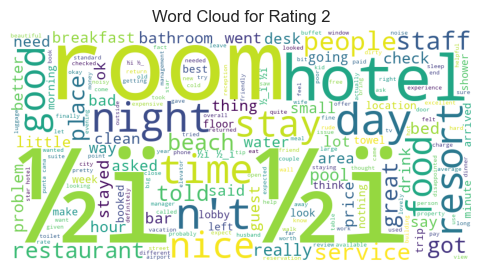

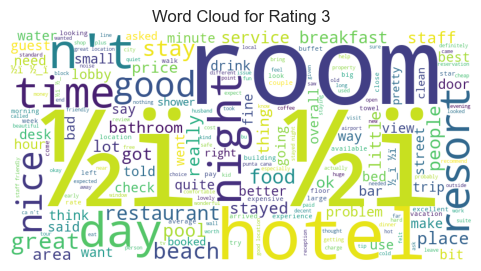

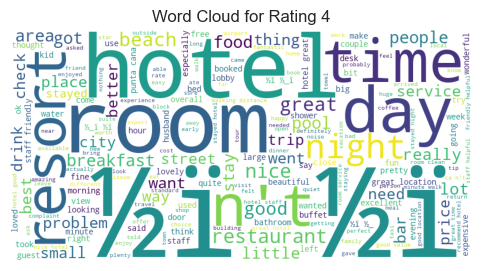

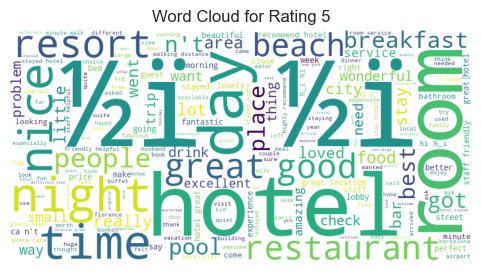

In [190]:
grouped_data = df.groupby('Rating')

def create_wordcloud(text):
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
  plt.figure(figsize=(6, 3), facecolor=None)
  plt.imshow(wordcloud)
  plt.axis('off')

for name, group in grouped_data:
  text = ' '.join(group['Review'])
  create_wordcloud(text)
  plt.title(f'Word Cloud for Rating {name}')


In [191]:
from collections import Counter

grouped_data = df.groupby('Sentiment_category')

def get_top_keywords(text_data, n=10):
  words = []
  for sentence in text_data:
      for word in word_tokenize(sentence):
          if word.lower() not in stopwords.words('english'):
              words.append(word)

  word_freq = Counter(words)
  top_keywords = word_freq.most_common(n)
  return top_keywords

for name, group in grouped_data:
  top_keywords = get_top_keywords(group['Review'].tolist())
  print(f"Top keywords for {name} sentiment:")
  for keyword, count in top_keywords:
    print(f"{keyword}: {count}")
  print()

Top keywords for neg sentiment:
hotel: 2592
room: 2367
n't: 1161
stay: 818
service: 708
staff: 698
rooms: 691
night: 562
day: 547
time: 506

Top keywords for neut sentiment:
hotel: 2203
room: 1851
n't: 993
stay: 637
rooms: 587
staff: 498
good: 461
night: 432
stayed: 411
service: 400

Top keywords for pos sentiment:
hotel: 43581
room: 29775
great: 20430
n't: 16800
good: 15928
staff: 14891
stay: 13508
nice: 11780
rooms: 10653
location: 10381



In [192]:
data  = df.copy()

In [193]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = text.split()
  filtered_words = []
  for word in words:
      if word not in stop_words:
          filtered_words.append(word)

  return ' '.join(filtered_words)

data['Review'] = data['Review'].apply(remove_stopwords)

In [194]:
def remove_frequent_words(text, words_to_remove):
    filtered_words = []
    for word in text.split():
        if word not in words_to_remove:
            filtered_words.append(word)

    return ' '.join(filtered_words)

most_word = ['hotel', 'room', 'rooms', 'hotels']
data['Review'] = data['Review'].apply(lambda x: remove_frequent_words(x, most_word))


In [195]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [196]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  words = nltk.word_tokenize(text)
  lemmatized_words = []
  for word in words:
      lemmatized_word = lemmatizer.lemmatize(word)
      lemmatized_words.append(lemmatized_word)

  return ' '.join(lemmatized_words)

data['Review'] = data['Review'].apply(lemmatize_text)

In [197]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['Review'])

data['Review'] = data['Review'].apply(lambda x: tokenizer.texts_to_sequences([x])[0])

In [198]:
data["Review"]

0        [9, 180, 224, 33, 3, 239, 5, 885, 105, 241, 16...
1        [144, 141, 278, 277, 1567, 489, 497, 371, 841,...
2        [9, 65, 78, 4471, 529, 3, 2, 65, 398, 5791, 73...
3        [1294, 1, 5, 67, 8, 4471, 10, 34, 208, 1483, 1...
4        [1, 5, 1, 5, 52, 662, 401, 3792, 35, 156, 2, 7...
                               ...                        
20486    [37, 292, 834, 782, 8, 130, 1199, 39, 88, 192,...
20487    [1, 10, 46, 35, 1, 416, 18, 5605, 544, 64, 295...
20488    [144, 167, 9, 170, 148, 55, 4, 2, 666, 27, 150...
20489    [3420, 2396, 106, 752, 2325, 1283, 949, 101, 7...
20490    [28, 1146, 192, 2, 451, 34, 799, 2, 317, 8544,...
Name: Review, Length: 20491, dtype: object

In [199]:
max_length = 0
for review in data['Review']:
    if len(review) > max_length:
        max_length = len(review)
print(f"max length of sentence: {max_length}")

max length of sentence: 1850


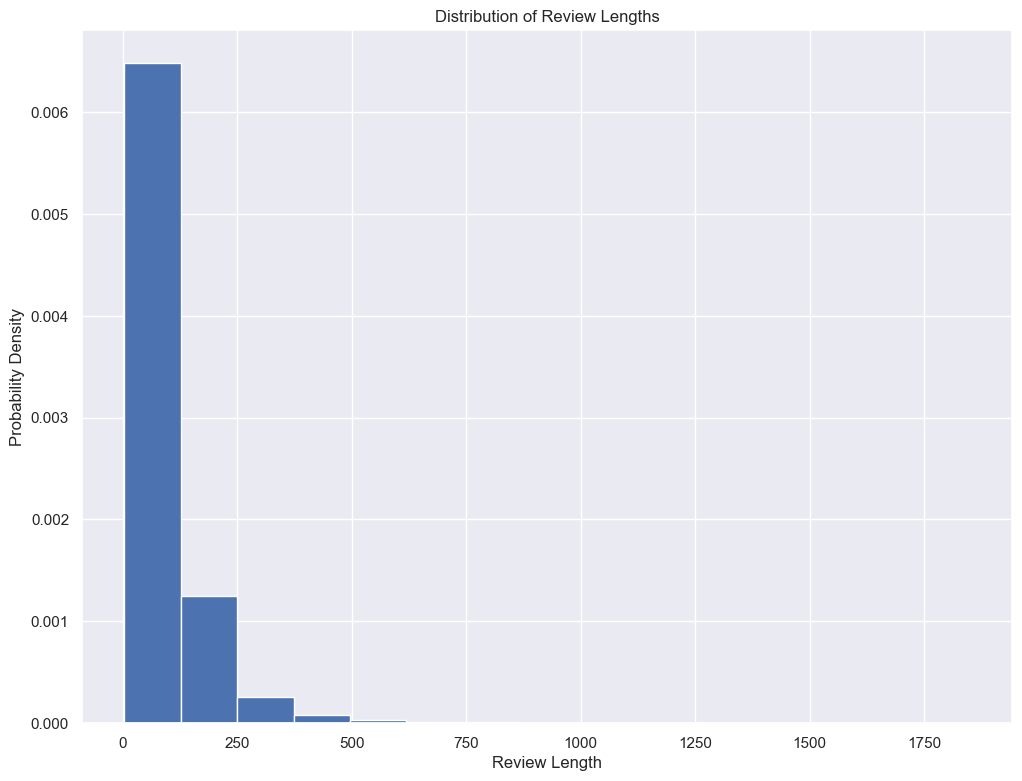

In [200]:
review_lengths = [len(review) for review in data['Review']]

plt.hist(review_lengths, bins=15, density=True)
plt.xlabel('Review Length')
plt.ylabel('Probability Density')
plt.title('Distribution of Review Lengths')
plt.show()

In [201]:
X = pad_sequences(data['Review'], padding='post', maxlen=600)

In [202]:
X

array([[   9,  180,  224, ...,    0,    0,    0],
       [ 144,  141,  278, ...,    0,    0,    0],
       [   9,   65,   78, ...,    0,    0,    0],
       ...,
       [ 144,  167,    9, ...,    0,    0,    0],
       [ 923, 2369, 1784, ...,  329, 4996, 3945],
       [  28, 1146,  192, ...,    0,    0,    0]])

In [203]:
y

tensor([4, 2, 3,  ..., 2, 1, 2])

In [204]:
X = torch.tensor(X)
y = torch.tensor(data['Rating'])

attention_mask = torch.where(X != 0, 1, 0)

dataset = TensorDataset(X, attention_mask, y)

In [205]:
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [207]:
class BERT_Classifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(BERT_Classifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        
        # Freeze BERT layers if desired
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
        self.dropout = nn.Dropout(0.1)
        self.linear = nn.Linear(768, 5)
        self.relu = nn.ReLU()

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs[0] 
        pooled_output = torch.mean(last_hidden_state, dim=1) 
        output = self.dropout(pooled_output)
        output = self.linear(output)
        output = self.relu(output)
        return output

model = BERT_Classifier()

Error while downloading from https://cdn-lfs.huggingface.co/bert-base-uncased/68d45e234eb4a928074dfd868cead0219ab85354cc53d20e772753c6bb9169d3?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1722701547&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyMjcwMTU0N319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9iZXJ0LWJhc2UtdW5jYXNlZC82OGQ0NWUyMzRlYjRhOTI4MDc0ZGZkODY4Y2VhZDAyMTlhYjg1MzU0Y2M1M2QyMGU3NzI3NTNjNmJiOTE2OWQzP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=OHrRR9YZpsyIQvvnDuPWYu28ghDqcpyA3bA9K5XPSByecnAdIr06Y0e5QubXiT48nrWAAMCrQgAfHW6rZLoYs7cJ8Qmqf7pMM-URXIUmFZRW%7EYuHz43UkmpbVMK7tCTGeDAjGnbUvHXyDUk3AJJ3nLfF%7ERyokXvS22m0gfqhB3VdT8wYlZAzJ5sA28NsCFZ-FlPOj8WmunoPmZemTPCn7jWKqNYlI9esaXBC7ErVZdXEU0a50qUT6c7gJixjck2VAzGPmIUd68GMJg38UgCh9q5ClVPVzsUWpJLGZzEmeXCt7Sp2HYdPflp-rrSQpv9LPwRJbr8Ki-NT7pip9aoTgA__&Key-Pair-Id=K3ESJI6DHPFC7: HTTPSConnec

KeyboardInterrupt: 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

def train(model, train_loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = batch
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = 100 * correct / total

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    return total_loss / len(val_loader), accuracy, cm

In [ ]:
train_losses = []
val_losses = []
acc = 0
c_m = 0
best_val_loss = float('inf')
best_model_path = 'trip_advisor_da_weights.pth'

for epoch in range(5):
    train_loss = train(model, train_loader, optimizer, criterion)
    val_loss, accuracy, cm = evaluate(model, val_loader, criterion)
    acc = accuracy
    c_m = cm
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{5}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}")
    if val_loss < best_val_loss:
        best_val_loss = val_loss
    torch.save(model.state_dict(), best_model_path)

In [ ]:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()

In [ ]:
print(f"Validation Accuracy: {acc:.2f}%")

plt.figure(figsize=(8, 6))
sns.heatmap(c_m, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()